<h1><span style="color: #6495ED;">Air Quality Prediction</span></h1>

<h2><span style="color: #6495ED;">Exploratory Data Analysis (EDA) and Baseline Modeling</span></h2>

Prepared by Lipsita Tripathy

Email: lipsitalt@gmail.com

December 2023

| <h2><span style="color: #FF6F61;">Table of Contents</span></h2> |
|----------------------------------------------|
| Introduction                                 |
| Dataset Overview and Preprocessing           |
| Exploratory Data Analysis (EDA)               |
| Baseline Models and Evaluation Metrics        |
| Next Steps                                   |

## Data Dictionary
The project utilizes air quality data extracted from 20 stations in Delhi for the years 2018 and 2019. The dataset comprises 12 features with instances recorded at each station.
| **Features**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| Datetime                  | Timestamp indicating the date and time of the recorded data | -          |
| StationId                 | Unique identifier for each monitoring station               | Numeric    |
| PM2.5 (ug/m3)             | Particulate Matter with a diameter of 2.5 microns or less   | Numeric    |
| PM10 (ug/m3)              | Particulate Matter with a diameter of 10 microns or less   | Numeric    |
| NO (ug/m3)                | Nitric Oxide concentration                                  | Numeric    |
| NO2 (ug/m3)               | Nitrogen Dioxide concentration                               | Numeric    |
| NOx (ug/m3)               | Sum of Nitric Oxide and Nitrogen Dioxide concentrations     | Numeric    |
| NH3 (ug/m3)               | Ammonia concentration                                       | Numeric    |
| SO2 (ug/m3)               | Sulfur Dioxide concentration                                | Numeric    |
| CO (ug/m3)                | Carbon Monoxide concentration                               | Numeric    |
| Ozone (ug/m3)             | Ozone concentration                                         | Numeric    |
| Benzene (ug/m3)           | Concentration of Benzene in the air                          | Numeric    |
| Toluene (ug/m3)           | Concentration of Toluene in the air                          | Numeric    |
| RH (%)                    | Relative Humidity in percentage                             | Numeric    |
| WS (m/s)                  | Wind Speed in meters per second                              | Numeric    |
| WD (degree)               | Wind Direction in degrees                                   | Numeric    |
| BP (mmHg)                 | Barometric Pressure in millimeters of mercury               | Numeric    |
| AT (degree C)             | Ambient Temperature in degrees Celsius                      | Numeric    |
| RF (mm)                   | Rainfall in millimeters                                     | Numeric    |
| SR (W/mt2)                | Solar Radiation in Watts per square meter                    | Numeric    |
| Xylene (ug/m3)           | Concentration of Xylene in the air                            | Numeric    |


| **Trget**              | **Description**                                             | **Type**   |
|---------------------------|-------------------------------------------------------------|------------|
| y_AQI                     | Target variable representing the predicted Air Quality Index for next 24 hours| Numeric    |
| y_AQI_diff                | Target variable representing the differentiated predicted Air Quality Index for next 24 hours| Numeric    |

## Introduction

As we delve into Sprint 2 of our Air Quality Prediction project, let's reflect on the journey we began in Sprint 1. In the initial phase, we illuminated the critical issue of air pollution in Delhi, setting the stage for a comprehensive data-driven solution. Our objective is clear: harness the power of data science and machine learning to predict air quality, providing invaluable insights for decision-makers and contributing to a healthier future.

### Contextualizing the Problem

In Sprint 1, we painted a vivid picture of the air quality challenges faced by the residents of Delhi. The city's iconic landmarks, shrouded in haze, tell a tale of persistent air pollution. The detrimental impact on health, equivalent to smoking 44 cigarettes a day, demands urgent attention. Clean air, a fundamental necessity, is compromised, influencing life expectancy and overall well-being.

### Unraveling Data Complexity

Our dataset, a treasure trove of hourly pollution and weather measurements from 25 monitoring stations in Delhi, presented both challenges and opportunities. Focused on the temporal aspect, we filtered and processed the data, addressing missing values and ensuring the integrity of time series information. We navigated through the intricacies of AQI calculation, ensuring precision in our understanding of air quality.

### Sprint 2 Objectives:

#### Advanced Preprocessing

In Sprint 2, our journey continues with a meticulous focus on advanced preprocessing. We recognize the importance of refining our dataset, tackling additional preprocessing concerns, baseline modeling and ensuring it's primed for sophisticated modeling.

#### Comprehensive EDA

Exploratory Data Analysis (EDA) takes center stage as we embark on a deeper investigation. Our goal is to uncover intricate patterns, correlations, trends, and hidden insights that will guide us in making informed decisions during the modeling phase.

#### Baseline Modeling

With a strong foundation laid in Sprint 1, we transition to baseline modeling. Linear regression becomes our initial benchmark, followed by Decision Tree providing a baseline for assessing the performance of future, more complex models.

#### Evaluation Framework

We introduce a robust evaluation framework aligned with the practical use case of our models. This framework ensures meaningful assessments and guides our iterative model improvement process.

Through these efforts, we aim not only to predict air quality accurately but also to contribute to a future where clean air is a reality for everyone in Delhi.


*************************************************************************************

# 3. Baseline Modelling

*************************************************************************************

* baselinemodelling.ipynb

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import anderson
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/generated/Delhi_AQI_modelling_data_before_handling_skewness.csv')
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),Xylene (ug/m3),...,Volatility_Last_24hr,Volatility_Last_7d,Volatility_Last_30d,MA_Last_7d,MA_Last_30d,y_AQI,AQI_lag_24hr,AQI_lag_48hr,AQI_lag_168hr,AQI_Category
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,0.0,...,8.307496,29.124119,61.729239,380.964286,332.893056,389.0,340.0,387.0,434.0,Very Poor
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,0.0,...,9.525614,28.895636,61.732289,380.517857,332.954167,389.0,337.0,389.0,433.0,Very Poor
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,0.0,...,10.882691,28.663239,61.739243,380.107143,333.015278,386.0,334.0,391.0,431.0,Very Poor
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,0.0,...,12.369244,28.438398,61.750308,379.744048,333.080556,384.0,331.0,392.0,428.0,Very Poor
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,0.0,...,13.761359,28.220333,61.764238,379.410714,333.147222,382.0,330.0,391.0,426.0,Very Poor


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89784 entries, 0 to 89783
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              89784 non-null  object 
 1   AQI                   89784 non-null  float64
 2   PM2.5 (ug/m3)         89784 non-null  float64
 3   PM10 (ug/m3)          89784 non-null  float64
 4   NOx (ug/m3)           89784 non-null  float64
 5   NH3 (ug/m3)           89784 non-null  float64
 6   SO2 (ug/m3)           89784 non-null  float64
 7   CO (ug/m3)            89784 non-null  float64
 8   Ozone (ug/m3)         89784 non-null  float64
 9   Xylene (ug/m3)        89784 non-null  float64
 10  RH (%)                89784 non-null  float64
 11  WS (m/s)              89784 non-null  float64
 12  WD (degree)           89784 non-null  float64
 13  BP (mmHg)             89784 non-null  float64
 14  AT (degree C)         89784 non-null  float64
 15  RF (mm)            

In [4]:
# # Remove columns based on multi-colinerity analysis
# # List of columns to delete
# columns_to_delete = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "MA_Last_7d", "MA_Last_30d", "AQI_lag_24hr", "AQI_lag_48hr", "AQI_lag_168hr", "AQI_Category"]

# # Use the drop method to delete the columns
# df = df.drop(columns=columns_to_delete)

### Data Transformation for Skewness Correction

Skewness in the data is addressed through various transformations. For right-skewed features, a log transformation is applied. **It's important not to run this code multiple times to avoid unintended alterations.**

Remember, from our distribution plot, there were some columns that were right-skewed, and others had varying degrees of skewness. The log transformation specifically targets those columns for correction.

In [5]:
# Handle skewness in the data (DON'T RUN THIS CODE TWICE)
# Apply "log transformation" for right-skewed data
df['t_PM2.5 (ug/m3)'] = np.log1p(df['PM2.5 (ug/m3)'])
df['t_PM10 (ug/m3)'] = np.log1p(df['PM10 (ug/m3)'])
df['t_NOx (ug/m3)'] = np.log1p(df['NOx (ug/m3)'])
df['t_NH3 (ug/m3)'] = np.log1p(df['NH3 (ug/m3)'])
df['t_SO2 (ug/m3)'] = np.log1p(df['SO2 (ug/m3)'])
df['t_CO (ug/m3)'] = np.log1p(df['CO (ug/m3)'])
df['t_Ozone (ug/m3)'] = np.log1p(df['Ozone (ug/m3)'])
df['t_Xylene (ug/m3)'] = np.log1p(df['Xylene (ug/m3)'])
df['t_WS (m/s)'] = np.log1p(df['WS (m/s)'])
df['t_SR (W/mt2)'] = np.log1p(df['SR (W/mt2)'])
df['t_Volatility_Last_24hr'] = np.log1p(df['Volatility_Last_24hr'])
df['t_Volatility_Last_7d'] = np.log1p(df['Volatility_Last_7d'])
df['t_Volatility_Last_30d'] = np.log1p(df['Volatility_Last_30d'])
df['t_AQI_lag_24hr'] = np.log1p(df['AQI_lag_24hr'])
df['t_AQI_lag_48hr'] = np.log1p(df['AQI_lag_48hr'])
df['t_AQI_lag_168hr'] = np.log1p(df['AQI_lag_168hr'])

### Distribution Overview After Transformation

A grid of histograms illustrates the distribution of features after applying log and Box-Cox transformations. Each subplot represents a transformed feature, showcasing the changes in their distributions.

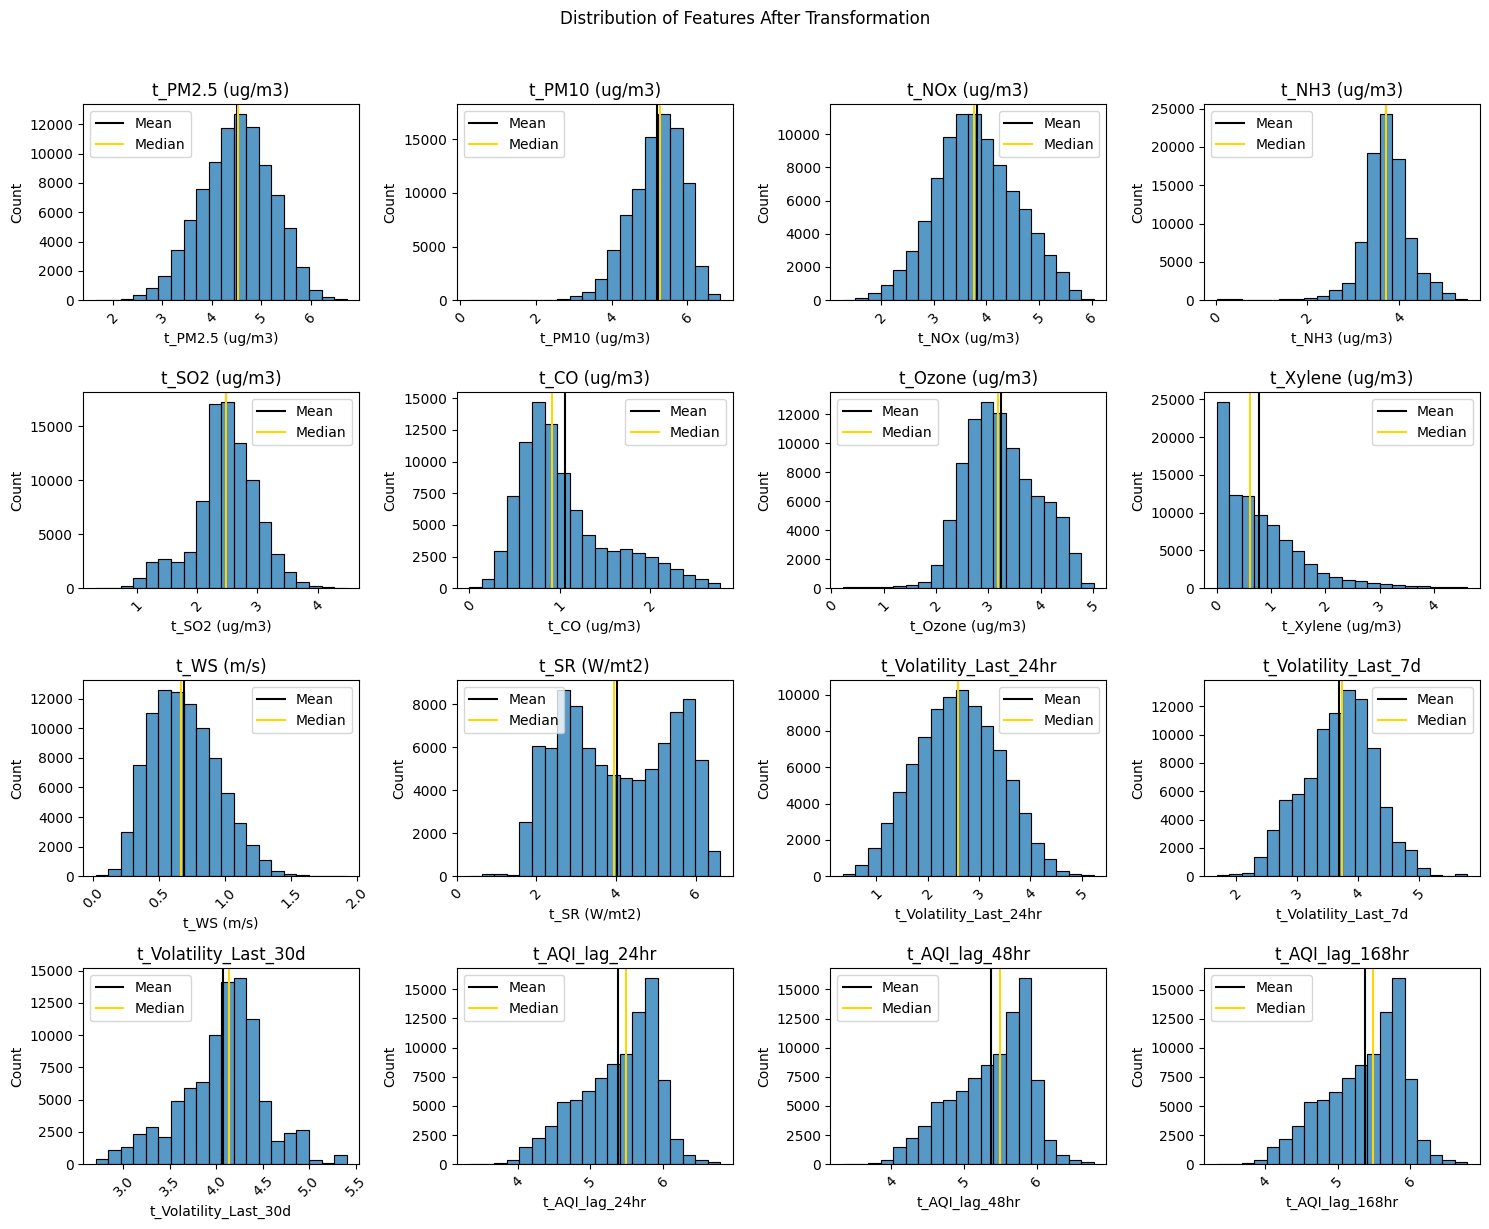

In [6]:
# Grid of Histograms after Log and Box-Cox Transformation
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
fig.suptitle('Distribution of Features After Transformation', y=1.02)

# List of features for plotting
features_to_plot = ['t_PM2.5 (ug/m3)', 't_PM10 (ug/m3)', 't_NOx (ug/m3)', 't_NH3 (ug/m3)', 't_SO2 (ug/m3)', 
                    't_CO (ug/m3)', 't_Ozone (ug/m3)', 't_Xylene (ug/m3)', 't_WS (m/s)', 't_SR (W/mt2)',
                    't_Volatility_Last_24hr', 't_Volatility_Last_7d', 't_Volatility_Last_30d', 't_AQI_lag_24hr', 't_AQI_lag_48hr', 't_AQI_lag_168hr']

# Counter for iterating through features
counter = 0

# Plot histograms for each feature
for i in range(4):
    for j in range(4):
        if counter < len(features_to_plot):
            ax = axes[i, j]
            sns.histplot(df[features_to_plot[counter]], bins=20, kde=False, ax=ax)
            ax.set_title(features_to_plot[counter])
            ax.tick_params(axis='x', rotation=45)
            ax.grid(False)

            # Adding mean and median lines
            ax.axvline(df[features_to_plot[counter]].mean(), c='black', label='Mean')
            ax.axvline(df[features_to_plot[counter]].median(), c='gold', label='Median')
            ax.legend()

            counter += 1
        else:
            # Remove empty subplots if the number of features is not a perfect square
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

Finding:

The transformed features demonstrate reduced skewness compared to their original distributions except the Xylene column. So, drop this column.

In [7]:
# List of columns to delete
columns_to_delete = ["Xylene (ug/m3)", "t_Xylene (ug/m3)"]

# Use the drop method to delete the columns
df = df.drop(columns=columns_to_delete)

In [8]:
# sanity check
df.head()

,Datetime,AQI,PM2.5 (ug/m3),PM10 (ug/m3),NOx (ug/m3),NH3 (ug/m3),SO2 (ug/m3),CO (ug/m3),Ozone (ug/m3),RH (%),...,t_CO (ug/m3),t_Ozone (ug/m3),t_WS (m/s),t_SR (W/mt2),t_Volatility_Last_24hr,t_Volatility_Last_7d,t_Volatility_Last_30d,t_AQI_lag_24hr,t_AQI_lag_48hr,t_AQI_lag_168hr
0,2013-01-01 00:00:00,354.0,290.774583,292.631667,117.224563,75.685556,9.992130,5.052250,13.794630,88.716778,...,1.800430,2.694264,0.314162,3.714195,2.230820,3.405326,4.138828,5.831882,5.961005,6.075346
1,2013-01-01 01:00:00,358.0,275.749821,296.150000,88.122976,66.740556,9.477546,7.665310,9.977963,89.612778,...,2.159328,2.395890,0.330103,3.673794,2.353812,3.397713,4.138876,5.823046,5.966147,6.073045
2,2013-01-01 02:00:00,362.0,271.463472,309.030000,61.464690,57.030556,9.207963,10.777421,7.316574,91.010556,...,2.466184,2.118250,0.329304,3.455326,2.475083,3.389909,4.138987,5.814131,5.971262,6.068426
3,2013-01-01 03:00:00,367.0,279.071667,317.826667,47.583524,43.298333,10.871667,11.793810,7.910146,91.930000,...,2.548961,2.187191,0.326422,3.079282,2.592957,3.382300,4.139163,5.805135,5.973810,6.061457
4,2013-01-01 04:00:00,370.0,269.118333,308.521667,43.535333,32.023333,11.020833,10.027778,9.348849,92.335556,...,2.400417,2.336875,0.379197,2.525195,2.692013,3.374865,4.139385,5.802118,5.971262,6.056784


### Data Types Overview

An overview of the data types present in the DataFrame is displayed 

In [9]:
df.dtypes

Datetime                   object
AQI                       float64
PM2.5 (ug/m3)             float64
PM10 (ug/m3)              float64
NOx (ug/m3)               float64
NH3 (ug/m3)               float64
SO2 (ug/m3)               float64
CO (ug/m3)                float64
Ozone (ug/m3)             float64
RH (%)                    float64
WS (m/s)                  float64
WD (degree)               float64
BP (mmHg)                 float64
AT (degree C)             float64
RF (mm)                   float64
SR (W/mt2)                float64
Year                        int64
Month                       int64
DayOfWeek                   int64
HourOfDay                   int64
Volatility_Last_24hr      float64
Volatility_Last_7d        float64
Volatility_Last_30d       float64
MA_Last_7d                float64
MA_Last_30d               float64
y_AQI                     float64
AQI_lag_24hr              float64
AQI_lag_48hr              float64
AQI_lag_168hr             float64
AQI_Category  

In [10]:
# look at the size of our data
df.shape

(89784, 45)

### Data Export before modeling

The DataFrame is exported to a CSV file before splitting, ensuring that the data is stored in a consistent format for further modeling steps.

In [11]:
# Exporting DataFrame to csv file before splitting
df.to_csv('data/generated/Delhi_AQI_final_df_before_modeling.csv', index=False)

### Feature Selection

Columns unnecessary for modeling, such as 'Datetime,' 'y_AQI' (target variable), 'AQI_Category,' and non-log-transformed features, are removed to focus on relevant input features.

In [12]:
# removing the columns that we don't need 
X_columns = df.drop(['Datetime', 'Year', 'y_AQI', 'AQI_Category',
                     'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NOx (ug/m3)', 'NH3 (ug/m3)', 'SO2 (ug/m3)',
                     'CO (ug/m3)', 'Ozone (ug/m3)', 'WS (m/s)', 'SR (W/mt2)',
                     'Volatility_Last_24hr', 'Volatility_Last_7d', 'Volatility_Last_30d'], axis=1).columns.tolist()

X = df[X_columns]
y = df['y_AQI']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89784 entries, 0 to 89783
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AQI                     89784 non-null  float64
 1   RH (%)                  89784 non-null  float64
 2   WD (degree)             89784 non-null  float64
 3   BP (mmHg)               89784 non-null  float64
 4   AT (degree C)           89784 non-null  float64
 5   RF (mm)                 89784 non-null  float64
 6   Month                   89784 non-null  int64  
 7   DayOfWeek               89784 non-null  int64  
 8   HourOfDay               89784 non-null  int64  
 9   MA_Last_7d              89784 non-null  float64
 10  MA_Last_30d             89784 non-null  float64
 11  AQI_lag_24hr            89784 non-null  float64
 12  AQI_lag_48hr            89784 non-null  float64
 13  AQI_lag_168hr           89784 non-null  float64
 14  t_PM2.5 (ug/m3)         89784 non-null

### Data Splitting for Modeling

The dataset is split into training and testing sets to facilitate model training and evaluation. The training set includes data up to August 2022, while the test set comprises data from September 2022 onwards.

In [14]:
# Split the data into training and testing sets
# Training set up to August 2022
train_data = df[df['Datetime'] < '2022-03-01']
X_train = train_data[X_columns]
y_train = train_data['y_AQI']

# Test set from September 2022 onwards
test_data = df[df['Datetime'] >= '2022-03-01']
X_test = test_data[X_columns]
y_test = test_data['y_AQI']

In [15]:
# sanity check
X_train.head()

,AQI,RH (%),WD (degree),BP (mmHg),AT (degree C),RF (mm),Month,DayOfWeek,HourOfDay,MA_Last_7d,...,t_CO (ug/m3),t_Ozone (ug/m3),t_WS (m/s),t_SR (W/mt2),t_Volatility_Last_24hr,t_Volatility_Last_7d,t_Volatility_Last_30d,t_AQI_lag_24hr,t_AQI_lag_48hr,t_AQI_lag_168hr
0,354.0,88.716778,271.718667,891.77100,9.671667,0.0,1,1,0,380.964286,...,1.800430,2.694264,0.314162,3.714195,2.230820,3.405326,4.138828,5.831882,5.961005,6.075346
1,358.0,89.612778,280.136667,915.14100,9.530000,0.0,1,1,1,380.517857,...,2.159328,2.395890,0.330103,3.673794,2.353812,3.397713,4.138876,5.823046,5.966147,6.073045
2,362.0,91.010556,278.156667,922.14550,8.321667,0.0,1,1,2,380.107143,...,2.466184,2.118250,0.329304,3.455326,2.475083,3.389909,4.138987,5.814131,5.971262,6.068426
3,367.0,91.930000,285.503333,943.45500,7.143333,0.0,1,1,3,379.744048,...,2.548961,2.187191,0.326422,3.079282,2.592957,3.382300,4.139163,5.805135,5.973810,6.061457
4,370.0,92.335556,310.760000,948.69619,5.734444,0.0,1,1,4,379.410714,...,2.400417,2.336875,0.379197,2.525195,2.692013,3.374865,4.139385,5.802118,5.971262,6.056784


As a sanity check after splitting the data, it's essential to verify the dimensions of the feature sets.

In [16]:
# Print the shapes of X_train and X_test
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (80304, 29)
X_test shape: (9480, 29)


### Train and Test Sets with Train-Test Split Highlighted

In [17]:
import plotly.graph_objects as go

# Assuming you have already defined the train and test DataFrames

# Plotting the training set
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['y_AQI'], mode='lines', name='Train', line=dict(color='blue')))

# Plotting the test set
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['y_AQI'], mode='lines', name='Test', line=dict(color='green')))

# Highlight the split between training and testing sets
fig.add_shape(
    type='line',
    x0=test_data.index[0],
    x1=test_data.index[0],
    y0=min(min(train_data['y_AQI']), min(test_data['y_AQI'])),
    y1=max(max(train_data['y_AQI']), max(test_data['y_AQI'])),
    line=dict(color='red', width=2, dash='dash'),
    name='Train-Test Split'
)

# Update layout
fig.update_layout(
    yaxis_title='y_AQI',
    xaxis_title='Date',
    title='Train and Test Sets with Train-Test Split Highlighted'
)

# Show the plot
fig.show()


### Feature Scaling with Standard Scaler

To maintain consistent scaling across features, the Standard Scaler is applied. It is initialized and fitted on the training data, and both the training and testing data are transformed accordingly.

In [18]:
# Initialize the scaler and fit on the training data
scaler = StandardScaler()

# Transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train) # X_train # scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # X_test # scaler.transform(X_test)

### Linear Regression Modeling

A Linear Regression model is initialized and trained using scaled training data. The model is then used to make predictions on the test set, allowing for the evaluation of its performance.

In [19]:
# Initialize and train the linear regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linreg_model.predict(X_test_scaled)

### Evaluate the Model Performance

### Mean Squared Error (MSE)

Mean Squared Error (MSE) is a measure of the average squared difference between predicted values and actual values. It provides insights into the accuracy of the model predictions, with lower values indicating better performance.

In [20]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2216.6499980928825


### R-squared (R2)

R-squared (R2) is a metric that quantifies the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features). It ranges from 0 to 1, where a higher value indicates a better fit of the model to the data.

In [21]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8012651345455208


c

The Percentage Mean Absolute Error (PMAE) is computed by taking the absolute percentage errors between the observed and predicted values, averaging them, and expressing the result as a percentage. This metric provides insights into the average magnitude of errors relative to the actual values.

In [22]:
# Calculate PMAE
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)
pmae = np.mean(absolute_percentage_errors) * 100

# Print the result
print(f'Percentage Mean Absolute Error (PMAE): {pmae:.2f}%')

Percentage Mean Absolute Error (PMAE): 20.04%


**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Features                           | R<sup>2<sup/>    |
|-------|----------------------------------------|-------|
| Linear Regression | All                                        | 0.80 |

### Model Diagnostics 

We need to check the assumptions associated with a linear regression model:

* **Residuals** are normally distributed.
* **Homoscedasticity**: The variance of residual is the same for any value of X.

### Significance of Residuals' Normality in Regression Analysis
Ensuring the normality of residuals in regression models is crucial for accurate statistical tests, precise parameter estimates, fulfilling model assumptions, optimizing predictions, identifying patterns for model improvement, and maintaining the reliability of inferences. While non-normality doesn't necessarily invalidate a model, it prompts caution, diagnostics, and consideration of alternatives, especially for large datasets.

## Remove columns based on multicollinearity analysis

After removing the features identified as multicollinear based on the correlation plot,
we will attempt to fit another linear model using the modified feature set.

In [23]:
# Remove columns based on multi-colinerity analysis
# List of columns to delete
columns_to_delete = ['t_PM2.5 (ug/m3)', 't_PM10 (ug/m3)', "MA_Last_7d", "MA_Last_30d", "AQI_lag_24hr", "AQI_lag_48hr", "AQI_lag_168hr", 't_AQI_lag_24hr', 't_AQI_lag_48hr', "t_AQI_lag_168hr"]

# Use the drop method to delete the columns
X_train_copy = X_train.drop(columns=columns_to_delete)

X_test_copy = X_test.drop(columns=columns_to_delete)

In [24]:
X_train_copy.head()

,AQI,RH (%),WD (degree),BP (mmHg),AT (degree C),RF (mm),Month,DayOfWeek,HourOfDay,t_NOx (ug/m3),t_NH3 (ug/m3),t_SO2 (ug/m3),t_CO (ug/m3),t_Ozone (ug/m3),t_WS (m/s),t_SR (W/mt2),t_Volatility_Last_24hr,t_Volatility_Last_7d,t_Volatility_Last_30d
0,354.0,88.716778,271.718667,891.77100,9.671667,0.0,1,1,0,4.772586,4.339713,2.397180,1.800430,2.694264,0.314162,3.714195,2.230820,3.405326,4.138828
1,358.0,89.612778,280.136667,915.14100,9.530000,0.0,1,1,1,4.490017,4.215685,2.349235,2.159328,2.395890,0.330103,3.673794,2.353812,3.397713,4.138876
2,362.0,91.010556,278.156667,922.14550,8.321667,0.0,1,1,2,4.134601,4.060970,2.323168,2.466184,2.118250,0.329304,3.455326,2.475083,3.389909,4.138987
3,367.0,91.930000,285.503333,943.45500,7.143333,0.0,1,1,3,3.883284,3.790947,2.474155,2.548961,2.187191,0.326422,3.079282,2.592957,3.382300,4.139163
4,370.0,92.335556,310.760000,948.69619,5.734444,0.0,1,1,4,3.796283,3.497214,2.486641,2.400417,2.336875,0.379197,2.525195,2.692013,3.374865,4.139385


### Feature Scaling with Standard Scaler

In [25]:
# Initialize the scaler and fit on the training data
scaler_copy = StandardScaler()

# Transform both training and testing data
X_train_scaled_copy = scaler.fit_transform(X_train_copy) # X_train # scaler.fit_transform(X_train)
X_test_scaled_copy = scaler.transform(X_test_copy) # X_test # scaler.transform(X_test)

### Fit another Linear Regresison model

In [26]:
# Initialize and train the linear regression model
linreg_model_2 = LinearRegression()
linreg_model_2.fit(X_train_scaled_copy, y_train)

# Make predictions on the test set
y_pred = linreg_model_2.predict(X_test_scaled_copy)

### Model Ecvaluation

In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calculate PMAE
absolute_percentage_errors = np.abs((y_test - y_pred) / y_test)
pmae = np.mean(absolute_percentage_errors) * 100

# Print the result
print(f'Percentage Mean Absolute Error (PMAE): {pmae:.2f}%')

Mean Squared Error: 2461.4958361356485
R-squared: 0.7793133583416172
Percentage Mean Absolute Error (PMAE): 22.07%


## Model Performance Comparison

### Original Model

- MSE: 2216.65, R²: 0.8013, PMAE: 20.04%

### Model After Removing Multicollinear Features

- MSE: 2461.50, R²: 0.7793, PMAE: 22.07%

### Comparison

- Original model outperformed after removing multicollinear features:
  - Lower MSE, higher R², and lower PMAE.

### Distribution of Residual Values

This histogram visualizes the distribution of residuals, representing the differences between observed and predicted values. Examining the distribution can provide insights into the model's accuracy and whether the residuals follow a normal distribution.

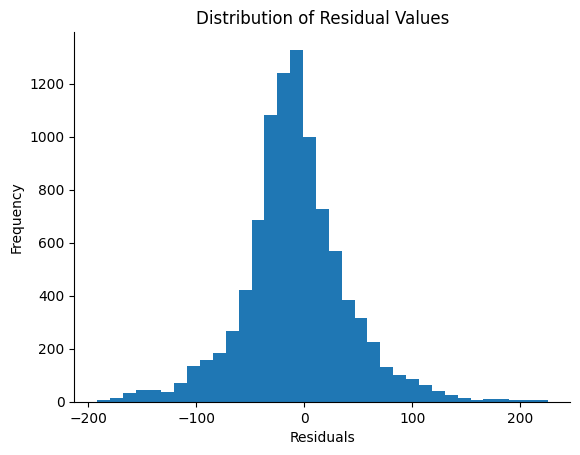

In [28]:
# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure()
plt.hist(residuals, bins=35)
plt.title('Distribution of Residual Values')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Choosing Anderson-Darling Test for Residual Normality in Large Datasets

In the context of assessing normality of residuals in a linear regression model, traditional tests like the Shapiro-Wilk test might produce inaccurate p-values and suggest departure from normality, especially with large datasets.

The Anderson-Darling test statistic is a measure of how well the sample data fit a particular distribution, in this case, a normal distribution. The critical values provided in the output are thresholds against which the test statistic is compared. If the test statistic exceeds the critical value, it suggests evidence against the null hypothesis that the data follow a normal distribution.

#### Alternative Approach:
Instead of relying solely on the Shapiro-Wilk test, which warns of potential accuracy issues for large sample sizes, the Anderson-Darling test is considered. The Anderson-Darling test is known to be less affected by large sample sizes and provides an alternative statistical evaluation.

In [29]:
result = anderson(residuals)
print("Anderson-Darling Test Statistic:", result.statistic)
print("Critical Values:", result.critical_values)

Anderson-Darling Test Statistic: 82.0695729252293
Critical Values: [0.576 0.656 0.787 0.918 1.092]


##### Result:
The Anderson-Darling test statistic is significantly larger than the critical values, indicating a substantial deviation from a normal distribution. The larger the test statistic, the stronger the evidence against normality.

### Residuals vs Predicted Values

This plot illustrates the residuals (differences between observed and predicted values) against predicted values. Examining the spread and patterns in the residuals can provide insights into the model's performance. A random and evenly distributed pattern is desirable, while distinct patterns may indicate issues such as heteroscedasticity.

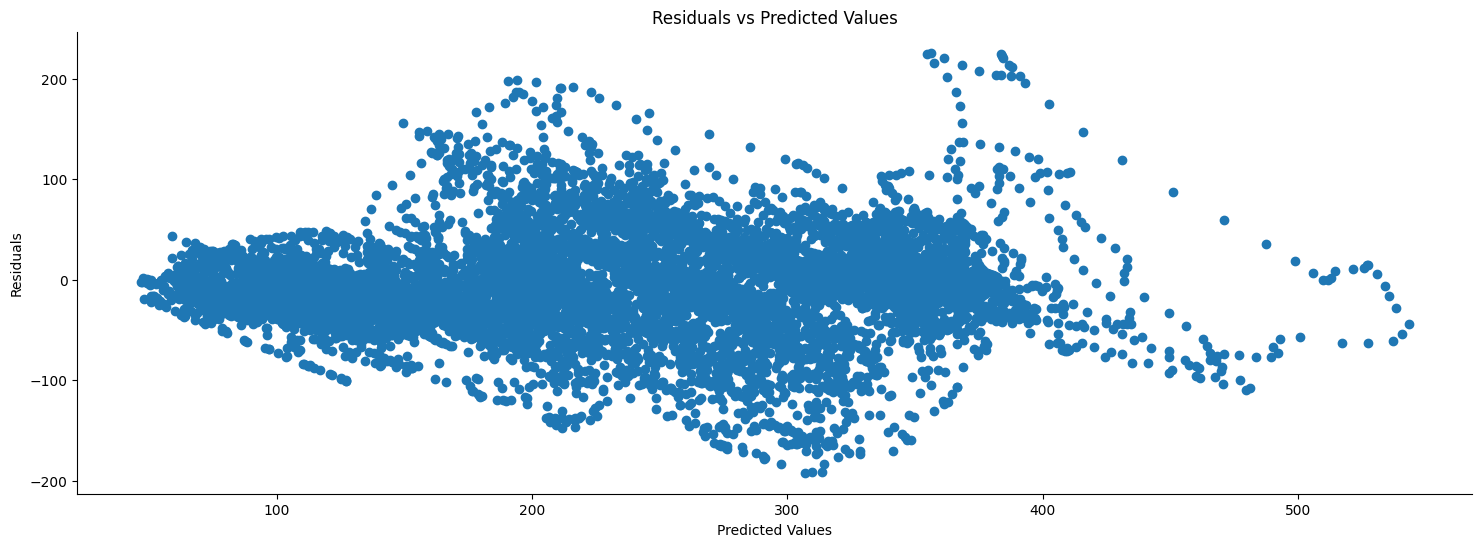

In [30]:
# Plot residuals (the differences between observed and predicted values) against predicted values to check for patterns or heteroscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(18, 6))
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Residual Plot Analysis

A scatter plot is created to visualize the residuals against the predicted values. This plot aids in assessing the distribution of residuals and identifying any patterns or trends, helping to validate the assumptions of the linear regression model.

### Q-Q Plot for Residuals

A Quantile-Quantile (Q-Q) plot is utilized to assess whether the residuals follow a normal distribution. The plot compares the distribution of residuals against the expected distribution (a straight line). Deviations from the line may indicate departures from normality in the residuals, influencing the model's assumptions.

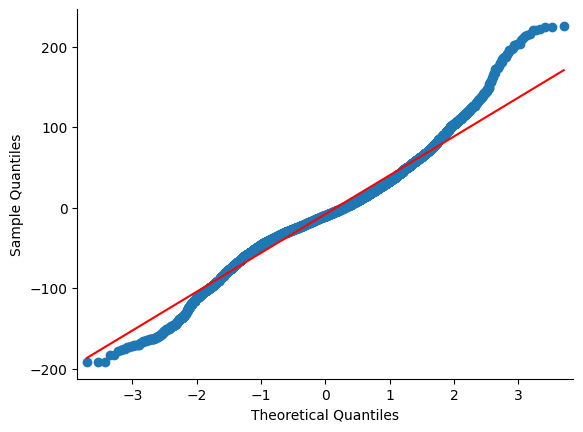

In [31]:
# Check if residuals are normally distributed using a Q-Q plot.
import statsmodels.api as sm
sm.qqplot(residuals, line='r')

# Remove top right frame
sns.despine(top=True, right=True)

# Remove grid lines
plt.grid(False)

plt.show()

### Normality Assessment:

For normality assessment, focus on the center and the tails of the plot.
The points in the center closely follow the reference line, it indicates normality in the central part of the distribution.

### Homoscedasticity

We perform this step to assess whether the variance of the residuals (the differences between observed and predicted values) is consistent across all levels of the independent variable(s).

### Evaluate Linear Regression Coefficients

The coefficients of the features in the linear regression model are examined to understand their impact on the target variable. The resulting DataFrame, sorted by coefficients, provides insights into which features contribute positively or negatively to the model's predictions.

In [32]:
# Check the coefficients of the features to understand their impact.
coefficients = linreg_model.coef_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

feature_importance_sorted = feature_importance.sort_values(by='Coefficient').reset_index(drop=True)

print(feature_importance_sorted)

                   Feature  Coefficient
0                   RH (%)    -8.461006
1               t_WS (m/s)    -8.450839
2            AT (degree C)    -6.612158
3            AQI_lag_168hr    -6.515477
4           t_AQI_lag_48hr    -4.043359
5            t_SO2 (ug/m3)    -2.107164
6                DayOfWeek    -1.797491
7             AQI_lag_24hr    -1.552363
8           t_AQI_lag_24hr    -1.534062
9            t_NH3 (ug/m3)    -1.290713
10  t_Volatility_Last_24hr    -1.059023
11            t_CO (ug/m3)    -0.222771
12                 RF (mm)     0.102854
13    t_Volatility_Last_7d     0.216322
14               HourOfDay     0.473065
15   t_Volatility_Last_30d     1.167811
16          t_PM10 (ug/m3)     1.266841
17               BP (mmHg)     1.932634
18             WD (degree)     3.906694
19            t_SR (W/mt2)     3.957868
20         t_Ozone (ug/m3)     4.223775
21                   Month     4.746352
22            AQI_lag_48hr     6.229594
23           t_NOx (ug/m3)     7.160784


### Visualize Feature Importance

The coefficients of the features are visualized through a bar plot, showcasing their respective importance in the model. This visualization provides insights into which features contribute significantly to the model's predictions, aiding in feature interpretation and selection.

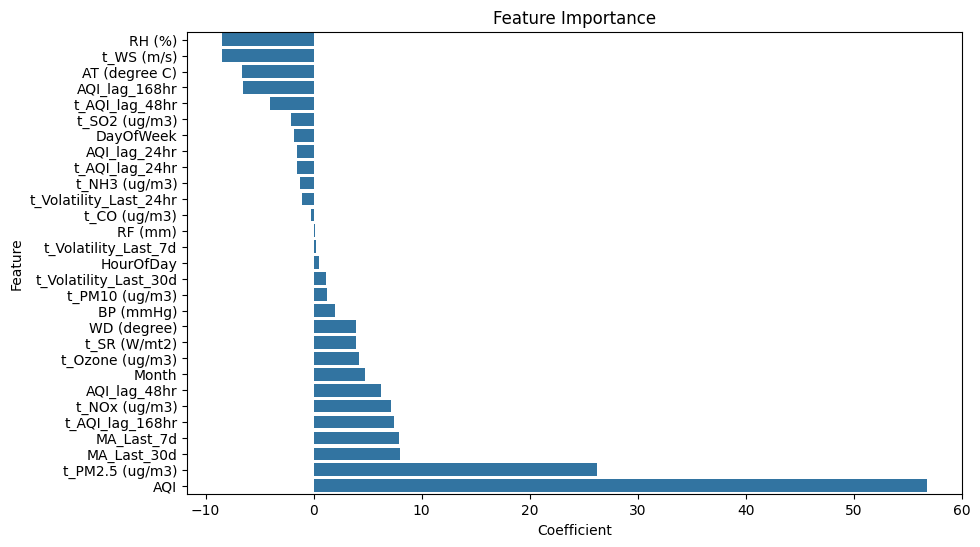

In [33]:
# Visualize the coefficients.
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.sort_values(by='Coefficient'))
plt.title('Feature Importance')
plt.show()

## Fitting a Decision Tree Model

In this section, we explore the process of fitting a Decision Tree model to predict the target variable (`y_AQI`) based on selected features.

In [34]:
# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on the training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

### Model Predictions

Predictions are generated using the decision tree model on both the training and testing sets. These predictions represent the model's estimated target values based on the input features. Examining predictions on both datasets aids in understanding how well the model generalizes to new, unseen data.

In [35]:
# Make predictions on the training set
y_train_pred = decision_tree_model.predict(X_train)

# Make predictions on the testing set
y_test_pred = decision_tree_model.predict(X_test)

### Model Evaluation

The decision tree model's performance is assessed on both the training and testing sets. Evaluation metrics, including Mean Squared Error (MSE) and R-squared (R²), are employed to quantify the model's accuracy and predictive capabilities. The printed results provide a comprehensive overview of the model's performance on both datasets.

In [36]:

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")

Training MSE: 3222.54, R^2: 0.77
Testing MSE: 2542.67, R^2: 0.77


### Visualizing Decision Tree Structure

A visual representation of the decision tree model is presented, providing insights into its hierarchical structure and decision-making process. The tree diagram illustrates how features contribute to the model's predictions, with nodes representing decision points and branches indicating possible outcomes.

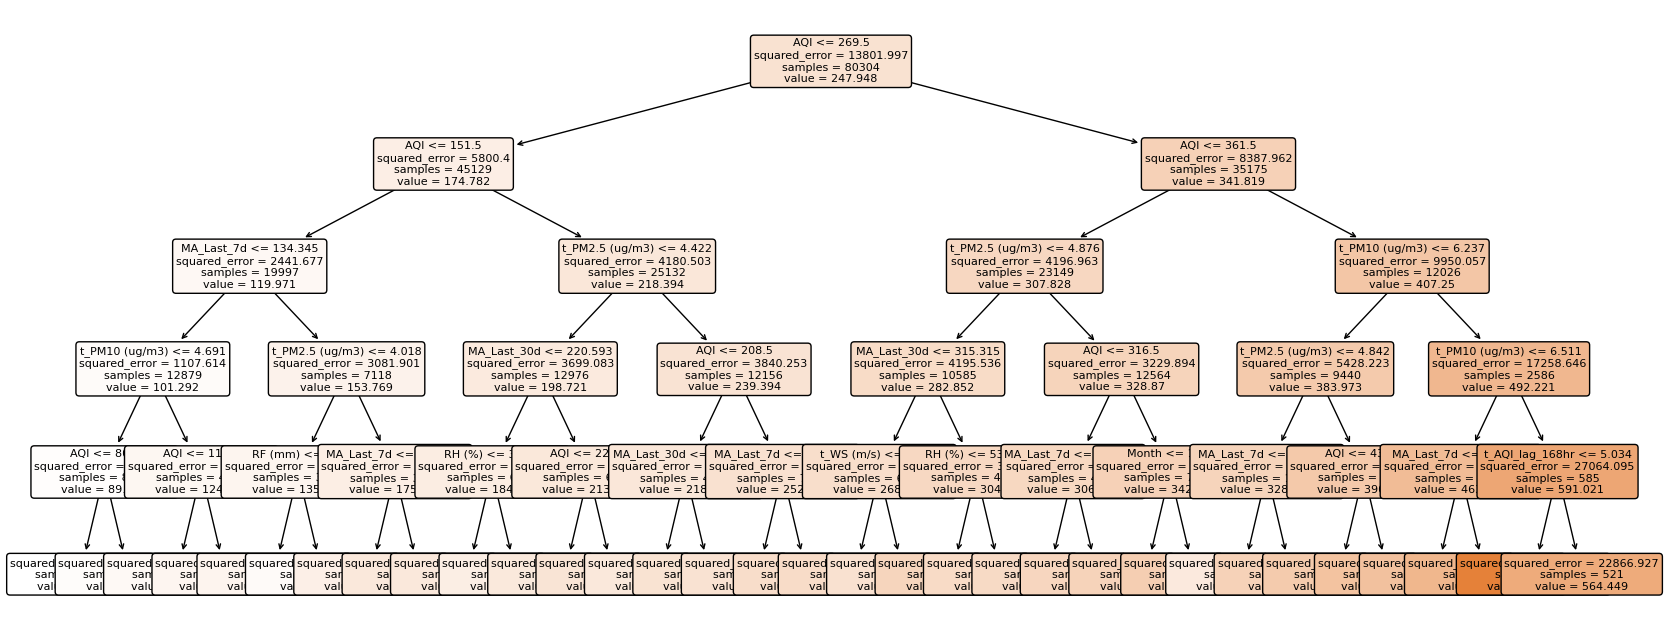

In [37]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,8))

plot_tree(decision_tree_model,
          feature_names=X_train.columns,
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax,
          fontsize=8)

plt.show()

### Optimizing Decision Tree:

1. **Define Hyperparameters:**
   - Specify hyperparameters with potential values, excluding baseline configurations.

2. **Set Up Time Series Cross-Validation:**
   - Create a TimeSeriesSplit object for time series cross-validation.

3. **Configure GridSearchCV:**
   - Utilize GridSearchCV with time series cross-validation to discover the best hyperparameters.

4. **Fit Model with Optimal Hyperparameters:**
   - Train the decision tree model with the selected hyperparameters on the training data.

5. **Highlight Best Hyperparameters:**
   - Showcase the determined best hyperparameters.

6. **Retrieve and Train Best Model:**
   - Get and fit the best decision tree model on the training data.

In [38]:
# Define the hyperparameters and their possible values excluding the baseline values
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a TimeSeriesSplit object for time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

# Create a GridSearchCV object with time series cross-validation
grid_search = GridSearchCV(
    decision_tree_model,
    param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_decision_tree_model = grid_search.best_estimator_

# Fit the best model on the training data
best_decision_tree_model.fit(X_train, y_train)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=3, random_state=42)

### Decision Tree Model Predictions

1. **Training Set Predictions:**
   - Utilize the trained decision tree model to make predictions on the training set.

2. **Testing Set Predictions:**
   - Extend predictions to the test set using the same decision tree model.

In [39]:
# Step 4: Make predictions on the training set
y_train_pred = best_decision_tree_model.predict(X_train)

# Make predictions on the test set
y_test_pred = best_decision_tree_model.predict(X_test)

### Decision Tree Model Evaluation Metrics

1. **Training Set Evaluation:**
   - Compute Mean Squared Error (MSE) and R-squared (\(R^2\)) on the training set.

2. **Testing Set Evaluation:**
   - Assess the model's performance on the testing set using MSE and \(R^2\).

In [40]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Step 8: Print the evaluation metrics
print(f"Training MSE: {mse_train:.2f}, R^2: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R^2: {r2_test:.2f}")

Training MSE: 3882.08, R^2: 0.72
Testing MSE: 3107.80, R^2: 0.72


#### Calculation of Percentage Mean Absolute Error (PMAE)

In [41]:
# Calculate PMAE
absolute_percentage_errors = np.abs((y_test - y_test_pred) / y_test)
pmae = np.mean(absolute_percentage_errors) * 100

# Print the result
print(f'Percentage Mean Absolute Error (PMAE): {pmae:.2f}%')

Percentage Mean Absolute Error (PMAE): 26.06%
